# Exploração dados COVID-19

## Em portugal

### Gráficos

In [1]:
import urllib.request
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from PyQt5.QtCore import QBuffer
df_portugal = pd.read_csv("https://raw.githubusercontent.com/jgrocha/covid-pt/master/situacao_epidemiologica.csv")
df_portugal.head()

,id,url,data_relatorio,suspeitos,confirmados,nao_confirmados,aguarda_resultados,recuperados,obitos,em_vigilancia,...,obitos_masculino_80_sup,obitos_feminino_0_9,obitos_feminino_10_19,obitos_feminino_20_29,obitos_feminino_30_39,obitos_feminino_40_49,obitos_feminino_50_59,obitos_feminino_60_69,obitos_feminino_70_79,obitos_feminino_80_sup
0,5,https://covid19.min-saude.pt/wp-content/upload...,2020-03-07,224,21,NaN,47.0,NaN,0,412.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6,https://covid19.min-saude.pt/wp-content/upload...,2020-03-08,281,30,NaN,56.0,NaN,0,447.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8,https://covid19.min-saude.pt/wp-content/upload...,2020-03-10,375,41,NaN,83.0,NaN,0,667.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11,https://covid19.min-saude.pt/wp-content/upload...,2020-03-13,1308,112,NaN,172.0,NaN,0,5674.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,12,https://covid19.min-saude.pt/wp-content/upload...,2020-03-14,1704,169,NaN,126.0,1.0,0,5011.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
sorted_df_portugal = df_portugal.sort_values(by=['data_relatorio'])

ageRange = [0,9]
confirmed_men = death_men = 0
confirmed_women = death_women = 0

for i in range(8):
    confirmed_men += sorted_df_portugal["confirmados_masculino_"+ \
                                        str(ageRange[0]) + "_" + str(ageRange[1])]
    confirmed_women += sorted_df_portugal["confirmados_feminino_" + \
                                          str(ageRange[0]) + "_" + str(ageRange[1])]
    death_men += sorted_df_portugal["obitos_masculino_"+ \
                                        str(ageRange[0]) + "_" + str(ageRange[1])]
    death_women += sorted_df_portugal["obitos_feminino_" + \
                                          str(ageRange[0]) + "_" + str(ageRange[1])]

    if ageRange[1] <= 20:
        confirmed_young = confirmed_men + confirmed_women
        death_young = death_men + death_women
    elif ageRange[1] <= 50:
        confirmed_adult = (confirmed_men + confirmed_women) - confirmed_young
        death_adult = (death_men + death_women) - death_young

    ageRange = [x+10 for x in ageRange]

confirmed_men += sorted_df_portugal["confirmados_masculino_80_sup"]
confirmed_women += sorted_df_portugal["confirmados_feminino_80_sup"]
confirmed_senior = (confirmed_men + confirmed_women) - (confirmed_adult +  confirmed_young)

death_men += sorted_df_portugal["confirmados_masculino_80_sup"]
death_women += sorted_df_portugal["confirmados_feminino_80_sup"]
death_senior = (death_men + death_women) - (death_adult +  death_young)

x = sorted_df_portugal.data_relatorio

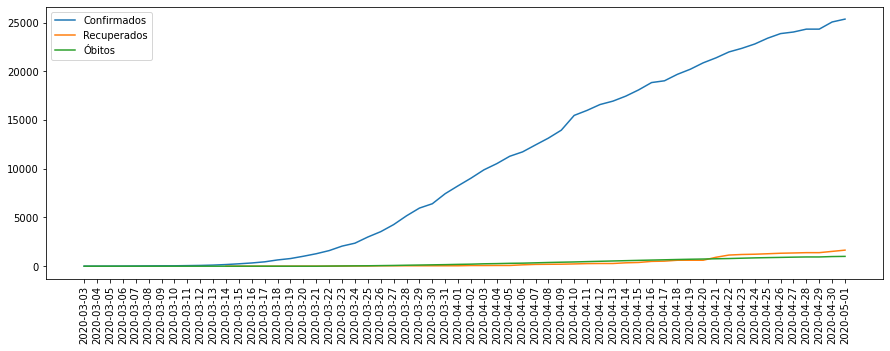

In [4]:
y_confirmed = sorted_df_portugal.confirmados
y_recovered = sorted_df_portugal.recuperados
y_deaths = sorted_df_portugal.obitos

plt.figure(figsize=(15,5))
plt.xticks(rotation=90)

plt.plot(x, y_confirmed, label="Confirmados")
plt.plot(x, y_recovered, label="Recuperados")
plt.plot(x, y_deaths, label="Óbitos")

plt.legend(loc="best")
plt.show()

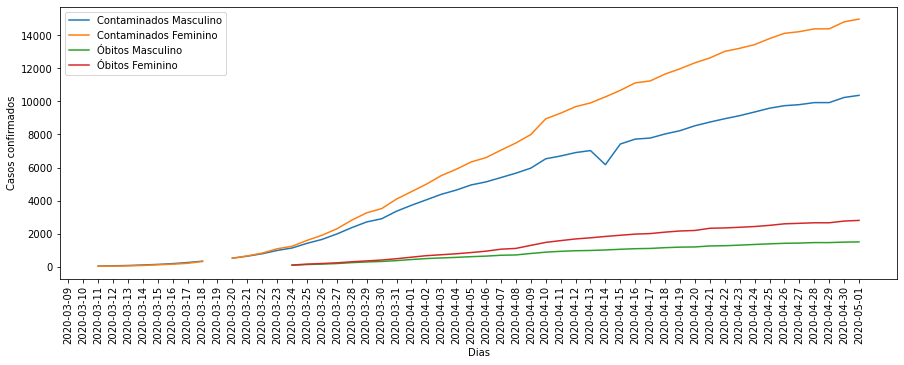

In [5]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)

plt.plot(x, confirmed_men, label="Contaminados Masculino")
plt.plot(x, confirmed_women, label="Contaminados Feminino")

plt.plot(x, death_men, label="Óbitos Masculino")
plt.plot(x, death_women, label="Óbitos Feminino")

plt.xlabel("Dias")
plt.ylabel("Casos confirmados")

plt.legend(loc="best")
plt.show()

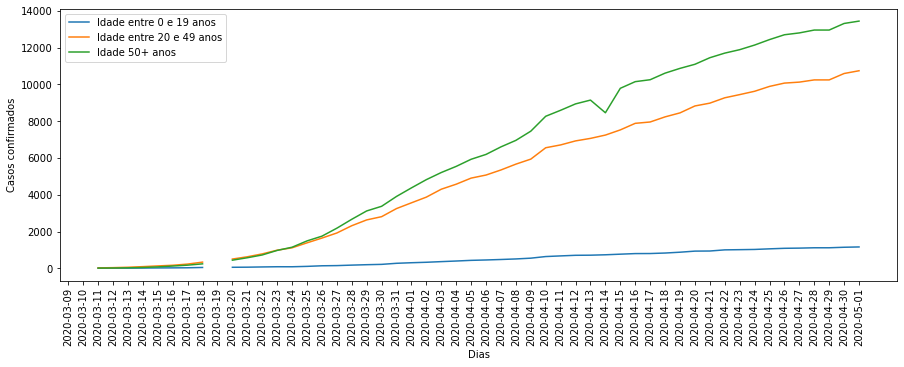

In [6]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)

plt.plot(x, confirmed_young, label="Idade entre 0 e 19 anos")
plt.plot(x, confirmed_adult, label="Idade entre 20 e 49 anos")
plt.plot(x, confirmed_senior, label="Idade 50+ anos")

plt.xlabel("Dias")
plt.ylabel("Casos confirmados")

plt.xticks(rotation=90)
plt.legend(loc="best")

plt.show()

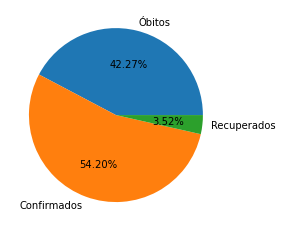

In [7]:
y_deaths = df_portugal.obitos.sum()
y_confirmed = sorted_df_portugal.confirmados.iat[-1]
y_recovered = sorted_df_portugal.recuperados.iat[-1]

data = [y_deaths, y_confirmed, y_recovered]
dataLabels = ["Óbitos", "Confirmados", "Recuperados"]
plt.pie(data, labels=dataLabels, autopct='%.2f%%')

plt.show()

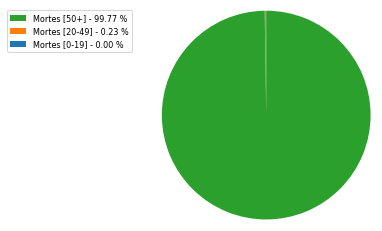

In [8]:
import numpy as np

death_young_last = death_young.iat[-1]
death_adult_last = death_adult.iat[-1]
death_senior_last= death_senior.iat[-1]

data = np.array([death_young_last, death_adult_last, death_senior_last])
dataLabels = ["Mortes [0-19]", "Mortes [20-49]", "Mortes [50+]"]

porcent = 100*data/sum(data)

patches, texts = plt.pie(data, startangle=90, radius=1.2)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(dataLabels, porcent)]

patches, labels, dummy =  zip(*sorted(zip(patches, labels, data),
                                          key=lambda x: x[2],
                                          reverse=True))

plt.legend(patches, labels, loc='best', bbox_to_anchor=(-0.1, 1.),
           fontsize=8)

plt.show()

## Mapas

In [9]:
import os
from osgeo import ogr
os.environ['QT_QPA_PLATFORM'] = 'offscreen'

#sys.path.append('/usr/share/qgis/python')
#sys.path.append('/usr/share/qgis/python/plugins')

from qgis.core import *
from qgis.PyQt.QtGui import QColor
from qgis.PyQt.QtCore import QSize, QBuffer, QIODevice

qgs = QgsApplication([], False)
qgs.initQgis()
print(QgsApplication.showSettings())

Application state:
QGIS_PREFIX_PATH env var:		
Prefix:		/usr
Plugin Path:		/usr/lib64/qgis
Package Data Path:	/usr/share/qgis
Active Theme Name:	
Active Theme Path:	/usr/share/qgis/resources/themes//icons/
Default Theme Path:	:/images/themes/default/
SVG Search Paths:	/usr/share/qgis/svg/
		/home/andre/.local/share/profiles/default/svg/
User DB Path:	/usr/share/qgis/resources/qgis.db
Auth DB Path:	/home/andre/.local/share/profiles/default/qgis-auth.db



In [10]:
# urllib.request.urlretrieve("https://github.com/jgrocha/covid-pt/raw/master/covid-pt-latest.gpkg",
#                            "/tmp/covid-pt-latest.gpkg")
urllib.request.urlretrieve("https://github.com/jgrocha/covid-pt/raw/master/covid-pt-2020-04-24.gpkg",
                           "/tmp/covid-pt-latest.gpkg")

covid_pt_gpkg = "/tmp/covid-pt-latest.gpkg"
conn = ogr.Open(covid_pt_gpkg)
for i in conn:
    vlayer = QgsVectorLayer("{}|layername={}".format(covid_pt_gpkg, i.GetName()), i.GetName(), "ogr")
    if not vlayer.isValid():
        print("Layer {} failed to load".format(i.GetName()))
    else:
        QgsProject.instance().addMapLayer(vlayer)
        print("Layer {} loaded".format(i.GetName()))

Layer concelho loaded
Layer distrito loaded
Layer raa_central_concelho loaded
Layer raa_central_ilha loaded
Layer raa_ocidental_concelho loaded
Layer raa_ocidental_ilha loaded
Layer raa_oriental_concelho loaded
Layer raa_oriental_ilha loaded
Layer ram_concelho loaded
Layer ram_ilha loaded
Layer layer_styles loaded
Layer confirmados_concelho loaded
Layer confirmados_distrito_ilha loaded
Layer situacao_epidemiologica loaded


In [11]:
def renderMap(layer, width):
    xt = layer.extent()
    width  = width
    height = int(width*xt.height()/xt.width())
    print("Gerar mapa com {} por {}".format(width, height))

    options = QgsMapSettings()
    options.setLayers([layer])
    options.setBackgroundColor(QColor(255, 255, 255))
    options.setOutputSize(QSize(width, height))
    options.setExtent(xt)

    render = QgsMapRendererParallelJob(options)
    render.start()
    render.waitForFinished()

    image = render.renderedImage()
    return image

In [12]:
from IPython.display import display, Image

def previewMap(image):
    imgbuf: QBuffer= QBuffer()
    imgbuf.open( QIODevice.ReadWrite )
    image.save( imgbuf,"PNG" )
    display(Image(imgbuf.data()))

Gerar mapa com 320 por 655


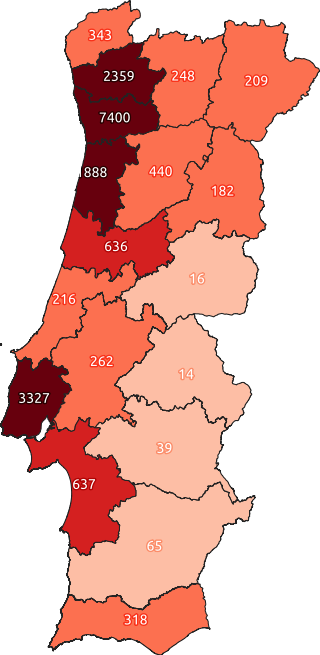

In [13]:
distrito_layer = QgsProject.instance().mapLayersByName("distrito")[0]
image = renderMap(distrito_layer, 320)
previewMap(image)

Gerar mapa com 320 por 655


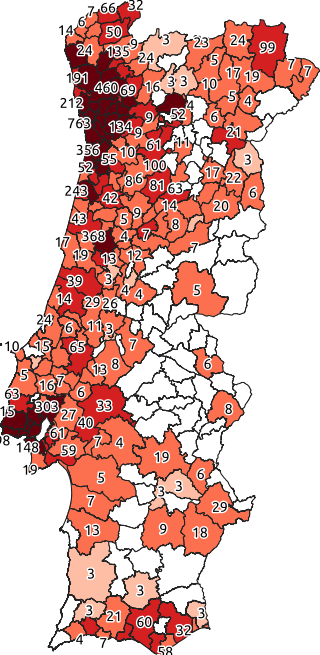

In [14]:
concelho_layer = QgsProject.instance().mapLayersByName("concelho")[0]
image = renderMap(concelho_layer, 320)
previewMap(image)

## Resto do Mundo

### Gráficos

In [15]:
df_world_confirmed = pd.read_csv("https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
df_world_confirmed.set_index('Country/Region', inplace=True)
df_world_confirmed.head()

,Province/State,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,33.0000,65.0000,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
Albania,NaN,41.1533,20.1683,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
Algeria,NaN,28.0339,1.6596,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
Andorra,NaN,42.5063,1.5218,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
Angola,NaN,-11.2027,17.8739,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [16]:
df_world_deaths = pd.read_csv("https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv")
df_world_deaths.set_index('Country/Region', inplace=True)
df_world_deaths.head()

,Province/State,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,33.0000,65.0000,0,0,0,0,0,0,0,...,36,40,42,43,47,50,57,58,60,64
Albania,NaN,41.1533,20.1683,0,0,0,0,0,0,0,...,26,27,27,27,27,28,28,30,30,31
Algeria,NaN,28.0339,1.6596,0,0,0,0,0,0,0,...,392,402,407,415,419,425,432,437,444,450
Andorra,NaN,42.5063,1.5218,0,0,0,0,0,0,0,...,37,37,37,40,40,40,40,41,42,42
Angola,NaN,-11.2027,17.8739,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


In [17]:
df_world_recovered = pd.read_csv("https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv")
df_world_recovered.set_index('Country/Region', inplace=True)
df_world_recovered.head()

,Province/State,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,33.0000,65.0000,0,0,0,0,0,0,0,...,150,166,179,188,188,207,220,228,252,260
Albania,NaN,41.1533,20.1683,0,0,0,0,0,0,0,...,345,356,385,394,403,410,422,431,455,470
Algeria,NaN,28.0339,1.6596,0,0,0,0,0,0,0,...,1152,1204,1355,1408,1479,1508,1558,1651,1702,1779
Andorra,NaN,42.5063,1.5218,0,0,0,0,0,0,0,...,282,309,333,344,344,344,385,398,423,468
Angola,NaN,-11.2027,17.8739,0,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,7,7


#### 5 países com mais pessoas infetadas

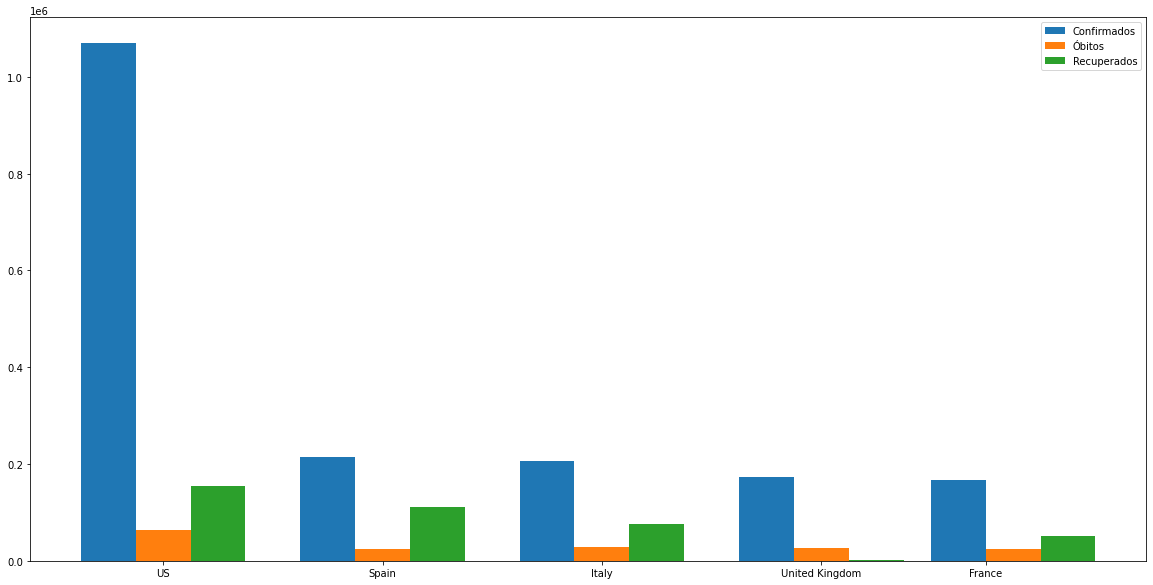

In [18]:
import numpy as np
import matplotlib.pyplot as plt

df_group_world_confirmed = df_world_confirmed.groupby(['Country/Region']).agg('sum')
last_month = list(df_group_world_confirmed.columns.values)[-1]
df_5_most_confirmed = df_group_world_confirmed.nlargest(5, last_month).loc[:, last_month]

x = list(df_5_most_confirmed.index)
global_confirmed = []
global_death = []
global_recovered = []

for i in range(5):
    global_confirmed.append(df_5_most_confirmed.iloc[i])
    global_death.append(df_world_deaths.loc[x[i], last_month].sum())
    global_recovered.append(df_world_recovered.loc[x[i], last_month].sum())

width = 2
plt.figure(figsize=(20,10))
pos = np.array([0,8,16,24,31])

plt.bar(pos, global_confirmed, width=2, label='Confirmados')
plt.bar(pos+width, global_death, width=2, label='Óbitos')
plt.bar(pos+width*2, global_recovered, width=2, label='Recuperados')

plt.legend()

plt.xticks([2, 10, 18, 26, 32], x)

plt.show()

### Mapas

In [19]:
import processing
from processing.core.Processing import Processing
from qgis.analysis import QgsNativeAlgorithms

Processing.initialize()

QgsApplication.processingRegistry().addProvider(QgsNativeAlgorithms())

/usr/share/qgis/python/plugins/processing/algs/qgis/ImportIntoSpatialite.py:103: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if uri.database() is '':
/usr/share/qgis/python/plugins/processing/algs/qgis/SpatialiteExecuteSQL.py:69: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if uri.database() is '':
/usr/share/qgis/python/plugins/processing/algs/grass7/Grass7Utils.py:192: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if path is '':


True

In [20]:
def join_location_summary(INPUT, JOIN, PREDICATE, JOIN_FIELDS, SUMMARIES, OUTPUT):
    parameters = { 
        'INPUT' : INPUT,
        'JOIN' : JOIN,
        'PREDICATE' : PREDICATE,
        'JOIN_FIELDS' : JOIN_FIELDS,
        'SUMMARIES' : SUMMARIES,
        'OUTPUT' : OUTPUT
    }
    feedback = QgsProcessingFeedback()

    return processing.run("qgis:joinbylocationsummary", parameters, feedback=feedback)

In [21]:
from qgis.PyQt import QtGui

def graduated_map(layer, myTargetField):
    myTargetField = myTargetField
    myRangeList = []

    myMin = -1
    myMax = -1
    myLabel = 'Sem dados'
    myColour = QtGui.QColor('#5c5c5c')
    mySymbol = QgsSymbol.defaultSymbol(layer.geometryType())
    mySymbol.setColor(myColour)
    myRange = QgsRendererRange(myMin, myMax, mySymbol, myLabel)
    myRangeList.append(myRange)

    myMin = 0
    myMax = 0
    myLabel = '0'
    myColour = QtGui.QColor('#ffffff')
    mySymbol = QgsSymbol.defaultSymbol(layer.geometryType())
    mySymbol.setColor(myColour)
    myRange = QgsRendererRange(myMin, myMax, mySymbol, myLabel)
    myRangeList.append(myRange)

    myMin = 0
    myMax = 100
    myLabel = '0 - 100'
    myColour = QtGui.QColor('#fdbea5')
    mySymbol = QgsSymbol.defaultSymbol(layer.geometryType())
    mySymbol.setColor(myColour)
    myRange = QgsRendererRange(myMin, myMax, mySymbol, myLabel)
    myRangeList.append(myRange)

    myMin = 100
    myMax = 10000
    myLabel = '100 - 10 000'
    myColour = QtGui.QColor('#fc7050')
    mySymbol = QgsSymbol.defaultSymbol(layer.geometryType())
    mySymbol.setColor(myColour)
    myRange = QgsRendererRange(myMin, myMax, mySymbol, myLabel)
    myRangeList.append(myRange)

    myMin = 10000
    myMax = 100000
    myLabel = '10 000 - 100 000'
    myColour = QtGui.QColor('#d42020')
    mySymbol = QgsSymbol.defaultSymbol(layer.geometryType())
    mySymbol.setColor(myColour)
    myRange = QgsRendererRange(myMin, myMax, mySymbol, myLabel)
    myRangeList.append(myRange)

    myMin = 100000
    myMax = 1000000
    myLabel = '100 000 - 1 000 000'
    myColour = QtGui.QColor('#67000d')
    mySymbol = QgsSymbol.defaultSymbol(layer.geometryType())
    mySymbol.setColor(myColour)
    myRange = QgsRendererRange(myMin, myMax, mySymbol, myLabel)
    myRangeList.append(myRange)

    myMin = 1000000
    myMax = 10000000
    myLabel = '1 000 000 - 10 000 000'
    myColour = QtGui.QColor('#300006')
    mySymbol = QgsSymbol.defaultSymbol(layer.geometryType())
    mySymbol.setColor(myColour)
    myRange = QgsRendererRange(myMin, myMax, mySymbol, myLabel)
    myRangeList.append(myRange)

    myRenderer = QgsGraduatedSymbolRenderer('', myRangeList)
    myRenderer.setClassAttribute(myTargetField)

    layer.setRenderer(myRenderer)
    return layer

In [22]:
urllib.request.urlretrieve("https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/10m/cultural/ne_10m_admin_0_countries.zip",
                           "/tmp/ne_10m_admin_0_countries.zip")

!unzip -o /tmp/ne_10m_admin_0_countries.zip -d /tmp/ne_10m_admin_0_countries

world_map_layer = QgsVectorLayer("/tmp/ne_10m_admin_0_countries/ne_10m_admin_0_countries.shp", "world", "ogr")
if not world_map_layer.isValid():
    print("world_map_layer failed to load!")

Archive:  /tmp/ne_10m_admin_0_countries.zip
  inflating: /tmp/ne_10m_admin_0_countries/ne_10m_admin_0_countries.README.html  
 extracting: /tmp/ne_10m_admin_0_countries/ne_10m_admin_0_countries.VERSION.txt  
 extracting: /tmp/ne_10m_admin_0_countries/ne_10m_admin_0_countries.cpg  
  inflating: /tmp/ne_10m_admin_0_countries/ne_10m_admin_0_countries.dbf  
  inflating: /tmp/ne_10m_admin_0_countries/ne_10m_admin_0_countries.prj  
  inflating: /tmp/ne_10m_admin_0_countries/ne_10m_admin_0_countries.shp  
  inflating: /tmp/ne_10m_admin_0_countries/ne_10m_admin_0_countries.shx  


#### Habitantes infetados com o COVID-19

In [23]:
urllib.request.urlretrieve("https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv",
                           "/tmp/confirmed_global.csv")

uri = "file://{uri}?delimiter={delimiter}&crs={crs}&xField={x}&yField={y}".format(uri="/tmp/confirmed_global.csv", delimiter=",", x="Long", y="Lat", crs="epsg:4326")

covid_layer = QgsVectorLayer(uri, "covid_layer", "delimitedtext")
if not covid_layer.isValid():
    print("covid_layer failed to load!")

Obtém o último dia para usar nos mapas

In [24]:
day_covid = list(pd.read_csv("https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
          .columns.values)[-1]

print(day_covid)

4/30/20


In [25]:
world_with_covid = join_location_summary(world_map_layer, covid_layer, 0, day_covid, 5, 'memory:')

In [26]:
world_with_covid['OUTPUT'] = graduated_map(world_with_covid['OUTPUT'], 'coalesce("' + day_covid + r'_sum", -1)')

Gerar mapa com 1290 por 622


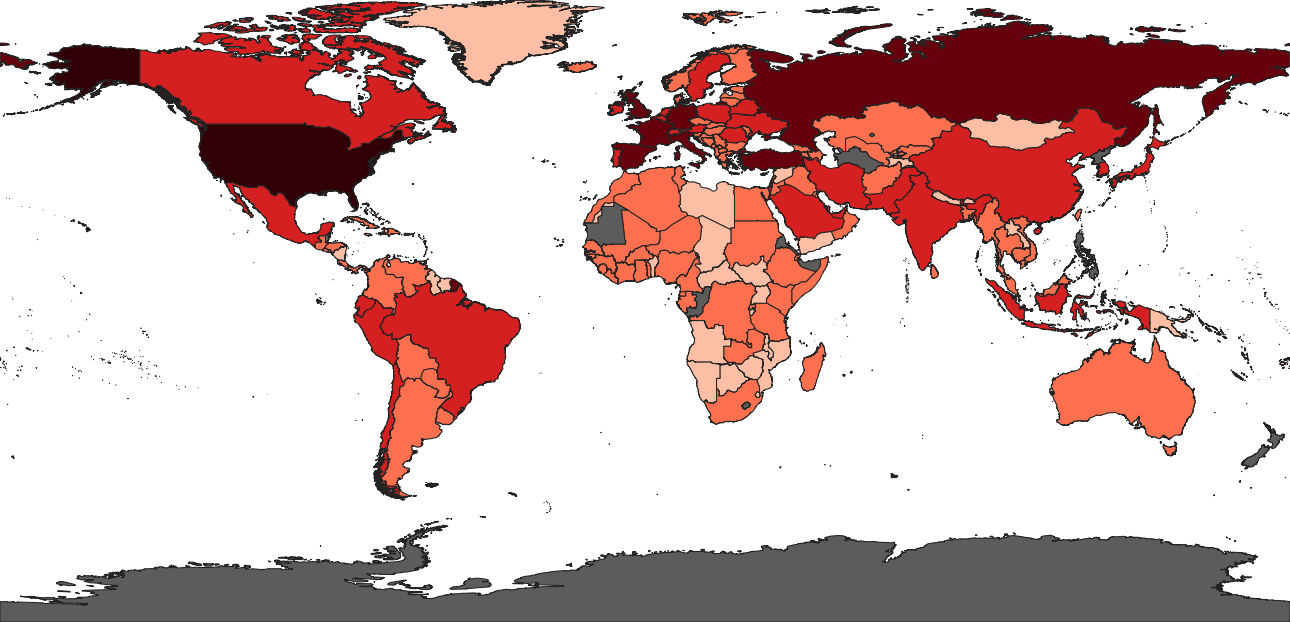

In [27]:
image = renderMap(world_with_covid['OUTPUT'], 1290)
previewMap(image)

#### Habitantes que morreram devido ao COVID-19

In [28]:
urllib.request.urlretrieve("https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv",
                           "/tmp/deaths_global.csv")

uri = "file://{uri}?delimiter={delimiter}&crs={crs}&xField={x}&yField={y}".format(uri="/tmp/deaths_global.csv", delimiter=",", x="Long", y="Lat", crs="epsg:4326")

covid_death_layer = QgsVectorLayer(uri, "covid_death_layer", "delimitedtext")
if not covid_death_layer.isValid():
    print("covid_death_layer failed to load!")

In [29]:
world_death_covid = join_location_summary(world_map_layer, covid_death_layer, 0, day_covid, 5, 'memory:')

In [30]:
world_death_covid['OUTPUT'] = graduated_map(world_death_covid['OUTPUT'], 'coalesce("' + day_covid + r'_sum", -1)')

Gerar mapa com 1290 por 622


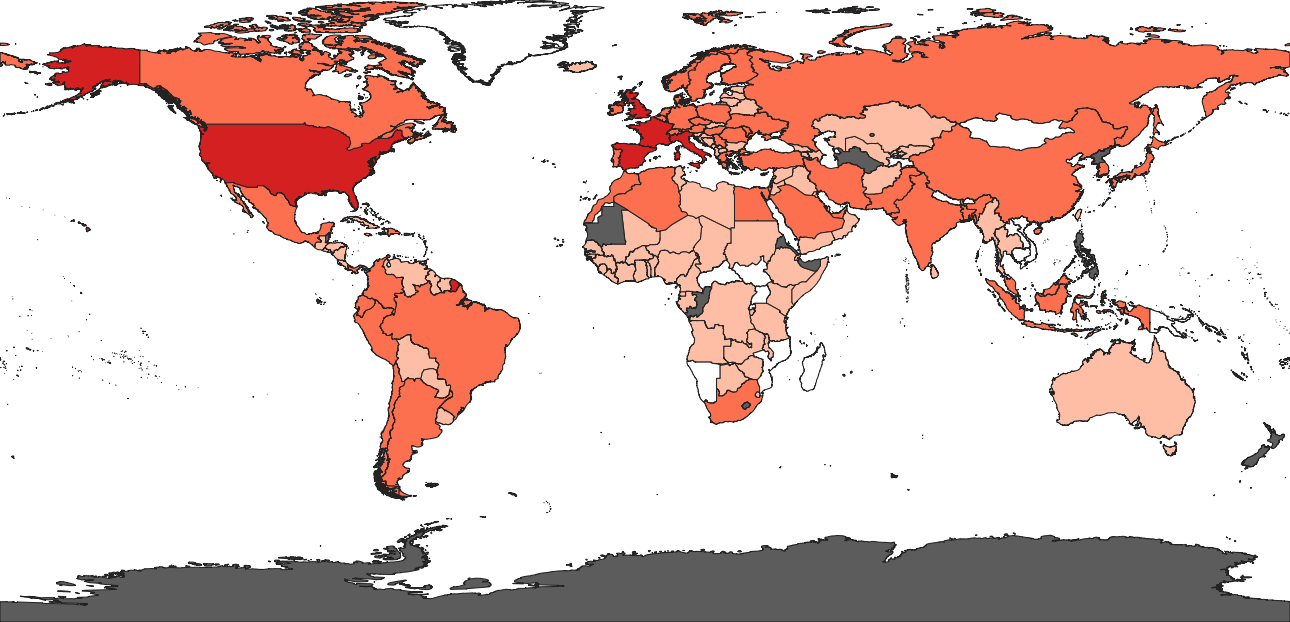

In [31]:
image = renderMap(world_death_covid['OUTPUT'], 1290)
previewMap(image)

#### Habitantes que recuperam do COVID-19

In [32]:
urllib.request.urlretrieve("https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv",
                           "/tmp/recovered_global.csv")

uri = "file://{uri}?delimiter={delimiter}&crs={crs}&xField={x}&yField={y}".format(uri="/tmp/recovered_global.csv", delimiter=",", x="Long", y="Lat", crs="epsg:4326")

covid_recovered_layer = QgsVectorLayer(uri, "covid_recovered_layer", "delimitedtext")
if not covid_recovered_layer.isValid():
    print("covid_recovered_layer failed to load!")

In [33]:
world_recovered_covid = join_location_summary(world_map_layer, covid_recovered_layer, 0, day_covid, 5, 'memory:')

In [34]:
world_recovered_covid['OUTPUT'] = graduated_map(world_recovered_covid['OUTPUT'], 'coalesce("' + day_covid + r'_sum", -1)')

Gerar mapa com 1290 por 622


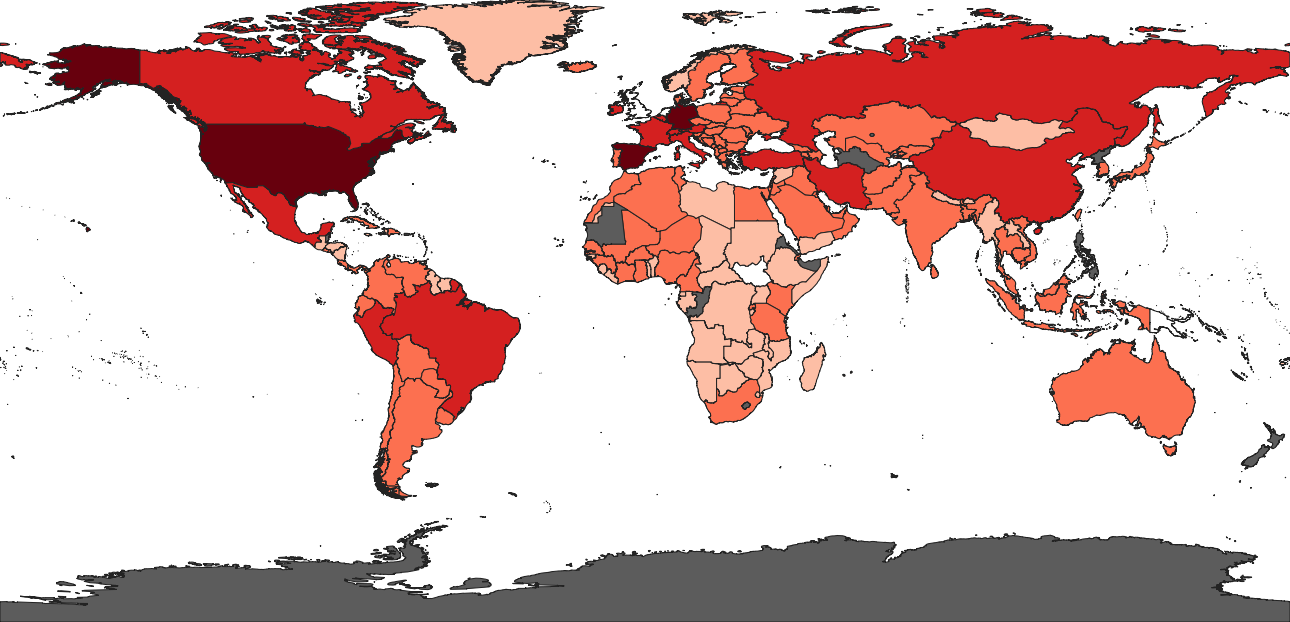

In [35]:
image = renderMap(world_recovered_covid['OUTPUT'], 1290)
previewMap(image)
